# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

This Python application will examine a dataset containing data on 3 million used cars in order to determine which factors influence the price of a car. The current CRISP-DM Data Mining Process Model (image below) will be used.



<center>
    <img src = images/crisp.png width = 50%/>
</center>

 

### Business Understanding

Using python and its libraries in a jupyter notebook, the business task is to determine which elements make an automobile more or less expensive. Not only will this application allow dealers to tag a price for a specific automobile that will be on the market, but it will also allow potential buyers to negotiate a reasonable price for any car she/he/they are interested in.

### Data Understanding

To acquire a basic knowledge of the column, column types, and fundamental data, look at the headings and information. discover data quality issues, such as NaNs, duplicates, and outliers to gain initial insights into the data and/or find intriguing subsets to create hypotheses about hidden information

In [142]:

#stats
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import SequentialFeatureSelector
#from sklearn.linear_model import GridSearch
from sklearn.preprocessing import MinMaxScaler
#pd.set_option("display.max_rows", None, "display.max_columns", None)
from matplotlib import style
from random import shuffle, seed

In [143]:
#Uploading dataset and first data overview
cars = pd.read_csv("data/vehicles.csv")
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The numerical "price" column is the target column. Only two more number columns remain: "odometer" and "year," with the remaining columns being category (ordinal and nominal). As a result, the majority of the dataset provided will be unbalanced prior to entering the modeling phase, implying that it will be difficult to some extent, especially given the limitations in cross-validation techniques that can be used, as well as the regression models options that can work in this case. There are "NaN" values in every column except "region," "price," and "state." There were no duplicates found. A data preparation, i.e., data cleaning process, is regarded to be necessary in order to provide additional insight into the aforementioned dataset.

### Data Preparation

The first step was to remove any null values from the dataset and to ensure that there were no duplicates. 

In [144]:
cars.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Removing ID column

In [161]:
cars.drop(['id'],axis=1,inplace=True)

KeyError: "['id'] not found in axis"

In [162]:
#Removing data
cars_1 = cars.dropna()

In [163]:
cars_1.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [164]:
# Inspecting updated table
cars_1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


A cross-correlation was performed between the original numerical columns: "price," "year," and "odometer." It indicates that there is a positive correlation between the columns "year" and "price" of 0.25. On the other hand, a negative association was discovered between the columns "odometer" and "price," thus it will not be used in further analysis.

<AxesSubplot:>

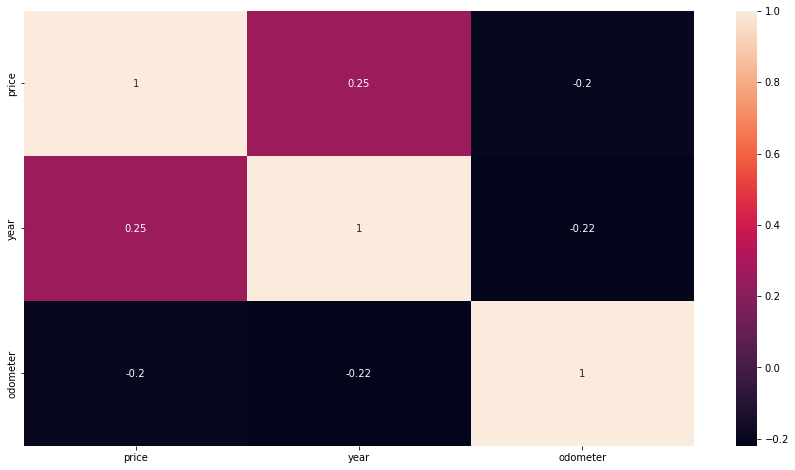

In [165]:
correlation =cars_1.corr()

plt.figure(figsize = (15,8))
sns.heatmap(correlation, annot=True)

C:\Users\mv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

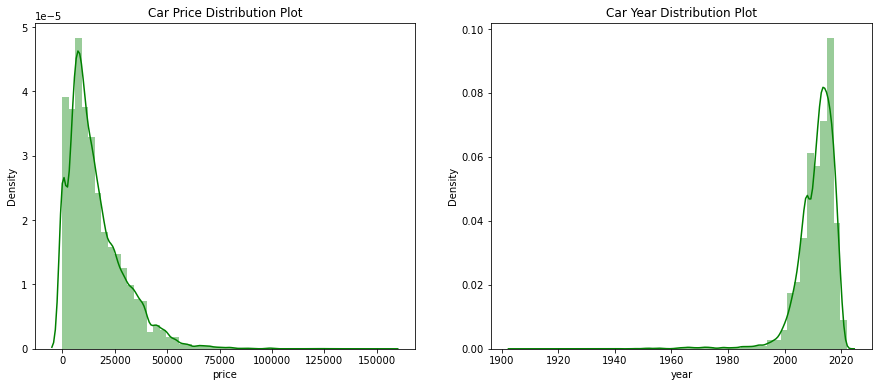

In [166]:
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(cars_1['price'], color='green')
plt.title('Car Price Distribution Plot')
plt.subplot(122)
sns.distplot(cars_1['year'], color='green')
plt.title('Car Year Distribution Plot')
plt.show


Text(0.5, 1.0, 'Car Price Box plot')

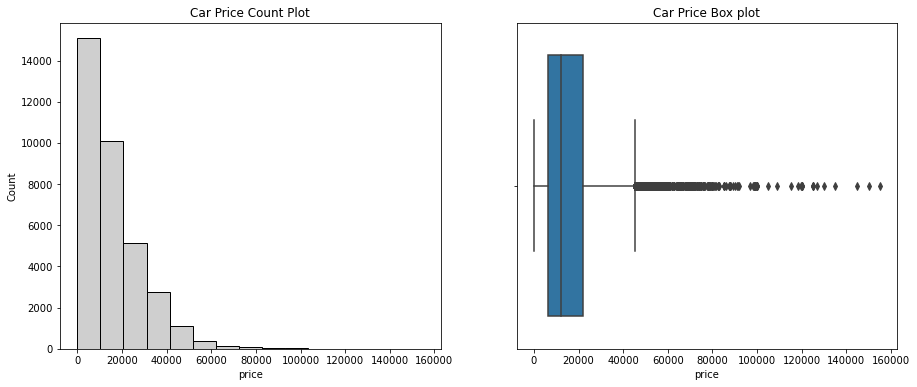

In [167]:
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.histplot(data=cars_1,x='price',bins=15,color="silver", edgecolor="black")
plt.title('Car Price Count Plot')
plt.subplot(122)
sns.boxplot(data=cars_1,x='price')
plt.title('Car Price Box plot')

Text(0.5, 1.0, 'Car year Box plot')

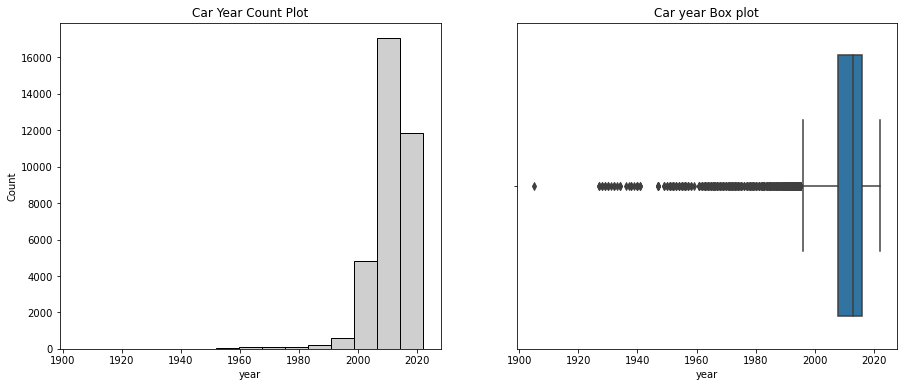

In [168]:
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.histplot(data=cars_1,x='year',bins=15,color="silver", edgecolor="black")
plt.title('Car Year Count Plot')
plt.subplot(122)
sns.boxplot(data=cars_1,x='year')
plt.title('Car year Box plot')

Text(0.5, 1.0, 'Car Odometer Box plot')

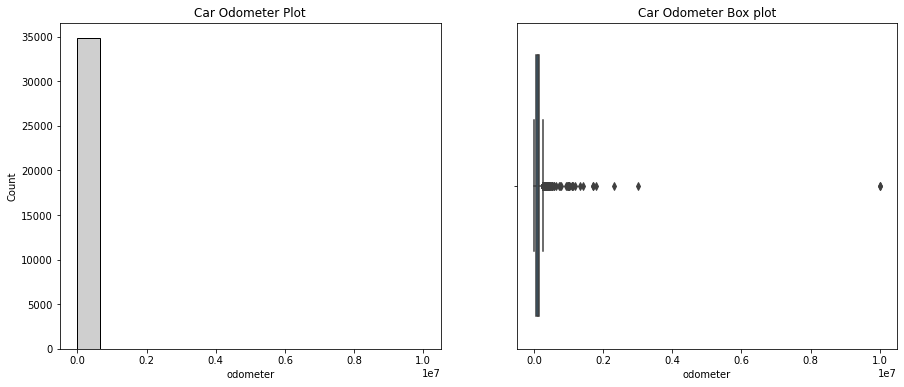

In [169]:
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.histplot(data=cars_1,x='odometer',bins=15,color="silver", edgecolor="black")
plt.title('Car Odometer Plot')
plt.subplot(122)
sns.boxplot(data=cars_1,x='odometer')
plt.title('Car Odometer Box plot')

Presence of the outliers in the data so further cleaning action will be needed.

From the below visuals we can obesrv that the most expesive cars have next charachteristics:

    - The most expensive cars are those that appear to be brand new, while the least expensive are those that appear to be in good condition.
    - Automatic transmission cars are the most expensive.
    - Cars that run on diesel are the most expensive, while hybrid cars are the least expensive.
    - Four-wheel-drive vehicles are the most expensive secondhand vehicles.
    - As expected, full-size cars are the most expensive, while tiny cars are the least expensive, which makes sense.
    - As is to be expected, cars with title status of "lien" are significantly more expensive, while those with title status of "missing" are slightly less so.


Text(0, 0.5, 'Price')

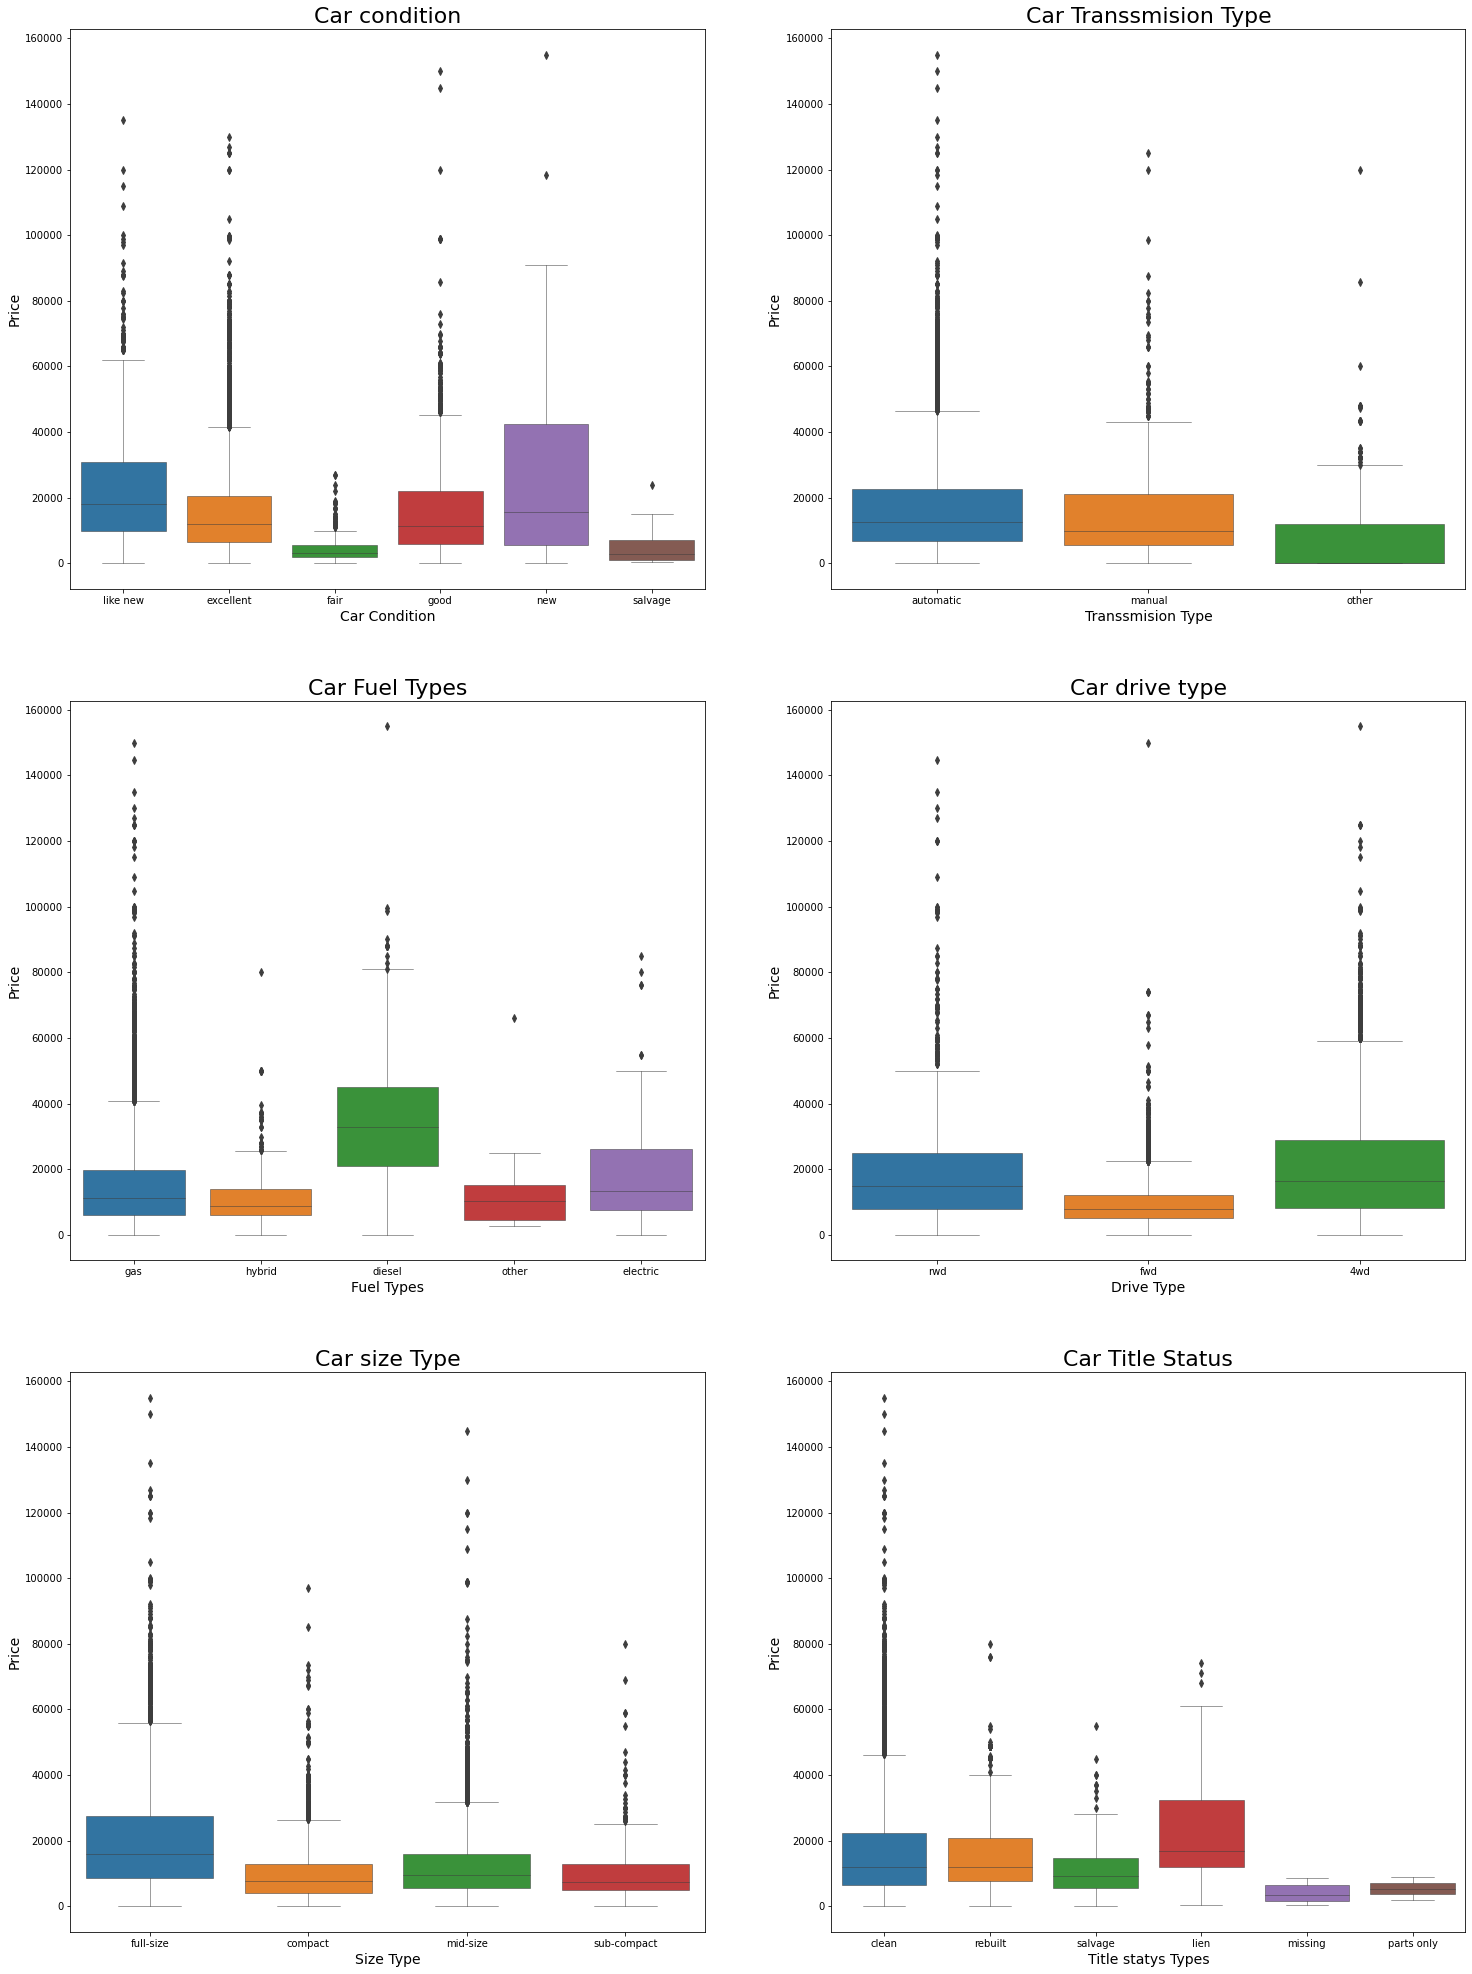

In [170]:
plt.figure(figsize = (25,35))

plt.subplot(321)
sns.boxplot(x = 'condition', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car condition', size=22)
plt.xlabel('Car Condition', size=14)
plt.ylabel('Price', size=14)

plt.subplot(322)
sns.boxplot(x = 'transmission', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car Transsmision Type', size=22)
plt.xlabel('Transsmision Type', size=14)
plt.ylabel('Price', size=14)

plt.subplot(323)
sns.boxplot(x = 'fuel', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car Fuel Types', size=22)
plt.xlabel('Fuel Types', size=14)
plt.ylabel('Price', size=14)

plt.subplot(324)
sns.boxplot(x = 'drive', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car drive type', size=22)
plt.xlabel('Drive Type', size=14)
plt.ylabel('Price', size=14)

plt.subplot(325)
sns.boxplot(x = 'size', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car size Type', size=22)
plt.xlabel('Size Type', size=14)
plt.ylabel('Price', size=14)

plt.subplot(326)
sns.boxplot(x = 'title_status', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car Title Status', size=22)
plt.xlabel('Title statys Types', size=14)
plt.ylabel('Price', size=14)

* The most expecive used cars are Ferrari and Aston martin. This is expected knowing the overall value of this brands. However, a supprising fact is that the third place belongs to Tesla.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'chevrolet'),
  Text(1, 0, 'toyota'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'mazda'),
  Text(4, 0, 'ford'),
  Text(5, 0, 'mercedes-benz'),
  Text(6, 0, 'ferrari'),
  Text(7, 0, 'lexus'),
  Text(8, 0, 'audi'),
  Text(9, 0, 'mitsubishi'),
  Text(10, 0, 'infiniti'),
  Text(11, 0, 'nissan'),
  Text(12, 0, 'volkswagen'),
  Text(13, 0, 'honda'),
  Text(14, 0, 'ram'),
  Text(15, 0, 'hyundai'),
  Text(16, 0, 'fiat'),
  Text(17, 0, 'cadillac'),
  Text(18, 0, 'jeep'),
  Text(19, 0, 'gmc'),
  Text(20, 0, 'jaguar'),
  Text(21, 0, 'volvo'),
  Text(22, 0, 'dodge'),
  Text(23, 0, 'kia'),
  Text(24, 0, 'chrysler'),
  Text(25, 0, 'subaru'),
  Text(26, 0, 'acura'),
  Text(27, 0, 'mini'),
  Text(28, 0, 'buick'),
  Text(29, 0, 'rover'),
  Text(30, 0, 'lincoln'),
  Text(31, 0, 'porsche'),
  Text(32, 0, 'saturn'

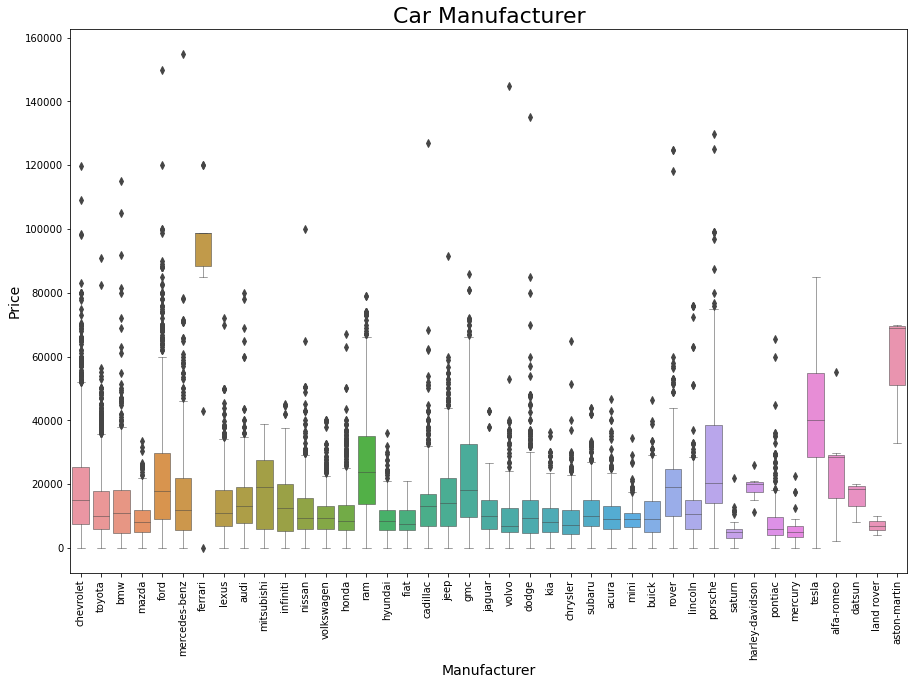

In [171]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'manufacturer', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car Manufacturer', size=22)
plt.xlabel('Manufacturer', size=14)
plt.ylabel('Price', size=14)
plt.xticks(rotation = 90)

* Trucks are more expensive than buses and convertibles, as many people may not realize. There is a competition between sedans and hatchbacks for the cheapest cars.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'van'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'convertible'),
  Text(3, 0, 'truck'),
  Text(4, 0, 'coupe'),
  Text(5, 0, 'SUV'),
  Text(6, 0, 'hatchback'),
  Text(7, 0, 'wagon'),
  Text(8, 0, 'pickup'),
  Text(9, 0, 'other'),
  Text(10, 0, 'mini-van'),
  Text(11, 0, 'offroad'),
  Text(12, 0, 'bus')])

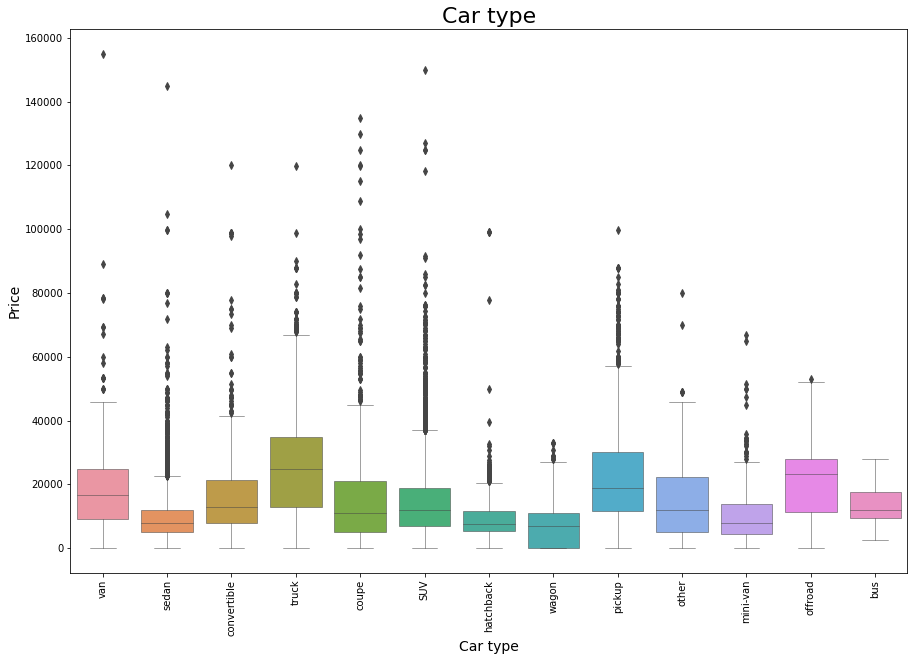

In [172]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'type', y = 'price', data = cars_1, linewidth=.5)
plt.title('Car type', size=22)
plt.xlabel('Car type', size=14)
plt.ylabel('Price', size=14)
plt.xticks(rotation = 90)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

MSE=  153,333,911.6154841
Coefs=  [ 0.00000000e+00 -8.43586304e+04  2.12220512e+01]


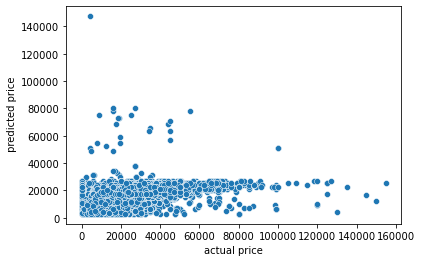

In [197]:
X = cars_1[['year']]
y = cars_1['price']
#print(df3.head())


pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 2)), ('quad_model', LinearRegression())])
pipe.fit(X, y)

preds = pipe.predict(X)
quad_pipe_mse = float(mean_squared_error(y, preds))
quad_reg = pipe.named_steps['quad_model']
coefs = quad_reg.coef_
format="{:,}".format(quad_pipe_mse)
print('MSE= ', format)  
print('Coefs= ',coefs)

sns.scatterplot(x=y, y=preds)
plt.xlabel("actual price")
plt.ylabel(' predicted price')
#plt.title('Actual price vs PolyFeatures Predicted price'fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.